In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.gridspec import GridSpec

from get_data import create_dataframe

In [26]:
username = "'Tiago'"

df = create_dataframe(username)

In [27]:
categories = df['Category'].unique()

In [28]:
df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category].copy()
    df_categories.append(df_category)

# for df_category in df_categories:
#     cat = df_category['Category'].iloc[0]
#     if cat == 'Gastos':
#         df_gastos = df_category
#         break
# print(df_gastos)
# df_gastos['Value'] = df_gastos['Value'].astype('float')
for df_category in df_categories:
    first_Value = df_category['Value'].iloc[0]
    first_type = df_category['Value'].loc[df_category['Type'] == df_category['Type'].iloc[0]]
    print('----\nvalue:', first_Value, df_category['Category'].iloc[0], df_category['Type'].iloc[0], len(first_type))

    try:
        df_category['Value'] = df_category['Value'].astype('float64')
        # print('FLOAT')
    except ValueError:
        # print('STRING')
        pass 

----
value: 7.95 Alimentação Fast Food 1
----
value: 18.8 Contas Água 4
----
value: 3.30 Gastos Café 12
----
value: 15x2 - 37kg Gym Abdutor 2
----
value: 1 Outros Reunião RED 4
----
value: Limao, Laranja e Mousse de chocolate Review Gelado 1
----
value: -20 Tarot Ana 1
----
value: 1 Transporte Autocarro 35


In [29]:
def get_category_df(df_categories, category):
    df_category = df_categories[categories.tolist().index(category)]
    return df_category

def get_type_df(df_category, type_):
    df_type = df_category.loc[df_category['Type'] == type_]
    return df_type

In [30]:
def time_series(type_of, df):
    values = df['Value']
    dates = df['Date']
    
    print('Here', df['Type'].iloc[0], len(values))

    dtFmt = mdates.DateFormatter('%b %d %Y %H:%M')

    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(range(1,31,2)))
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
    # plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=(range(0,24,24))))
    plt.xticks(rotation=25, fontweight='light')
    
    # plt.plot(dates,values, color='red')
    for date, value in zip(dates, values):
        plt.bar(date,value, width=0.1)
    # for date, value in zip(dates, values):
        # plt.scatter(dates,values)

    plt.title(category + ' - ' + type_of)
    plt.xlabel('Date')
    plt.ylabel('Value')

In [31]:
# pie chart of types
def pie_chart(df):
    types = df['Type'].unique()
    values = list()

    # if df['Value'].dtype == 'float64':
    #     for type_ in types:
    #         df_type = df.loc[df['Type'] == type_]
    #         values.append(df_type['Value'].sum())

    #     explode = [0.1 for i in range(len(types))]
    #     plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
    # else:
    values = df['Type'].value_counts()

    explode = [0.1 for i in range(len(types))]
    plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple'])

    # count the frequency of each type_
    # values = df['Type'].value_counts()

    plt.title('Pie chart of ' + category)

def pie_chart_all_categories(df):
    unique_categories = df['Category'].unique()

    values = list()

    values = df['Category'].value_counts()

    explode = [0.1 for i in range(len(categories))]
    plt.pie(values, labels=unique_categories, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple','brown','grey','black','pink'])

    plt.title('Pie chart of all categories')

In [32]:
# bar chart of types
def bar_chart(df):
    types = df['Type'].unique()
    values = list()

    if df['Value'].dtype == 'float64':
        for type_ in types:
            df_type = df.loc[df['Type'] == type_]
            values.append(df_type['Value'].sum())

        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
        for i, v in enumerate(values):
            plt.text(i, v-max(values)/15, str(round(v,2)), color='black', ha='center')
    else:
        for type_ in types:
            values.append(len(df.loc[df['Type']==type_]))
        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])

    plt.xticks(rotation=90, fontweight='light')
    plt.title('Bar chart of ' + category)

In [33]:
def plot_in_one(df_category, df, types):
    fig = plt.figure(figsize=(15, 5*len(types)))
    gs = GridSpec(nrows=len(types)+2, ncols=3,hspace = .75)

    ax0 = fig.add_subplot(gs[0, 0])
    pie_chart_all_categories(df)

    ax1 = fig.add_subplot(gs[0, 1])
    pie_chart(df_category)

    ax2 = fig.add_subplot(gs[0, 2])
    bar_chart(df_category)
    
    for each_type in types:
        df_type = df_category.loc[df_category['Type'] == each_type]
        ax3 = fig.add_subplot(gs[types.tolist().index(each_type) + 1, :])
        time_series(each_type,df_type)

    plt.show()

Categories of 'Tiago' :
 ['Alimentação' 'Contas' 'Gastos' 'Gym' 'Outros' 'Review' 'Tarot'
 'Transporte']

Types of Gastos :
 ['Café' 'Comboio' 'Férias' 'Geral' 'Lanche' 'Prendas' 'Refeições'
 'Shopping' 'Supermercado' 'Transporte' 'Trotinete' 'Uber']
Here Café 12
Here Comboio 3
Here Férias 1
Here Geral 3
Here Lanche 13
Here Prendas 2
Here Refeições 11
Here Shopping 4
Here Supermercado 20
Here Transporte 2
Here Trotinete 31
Here Uber 19


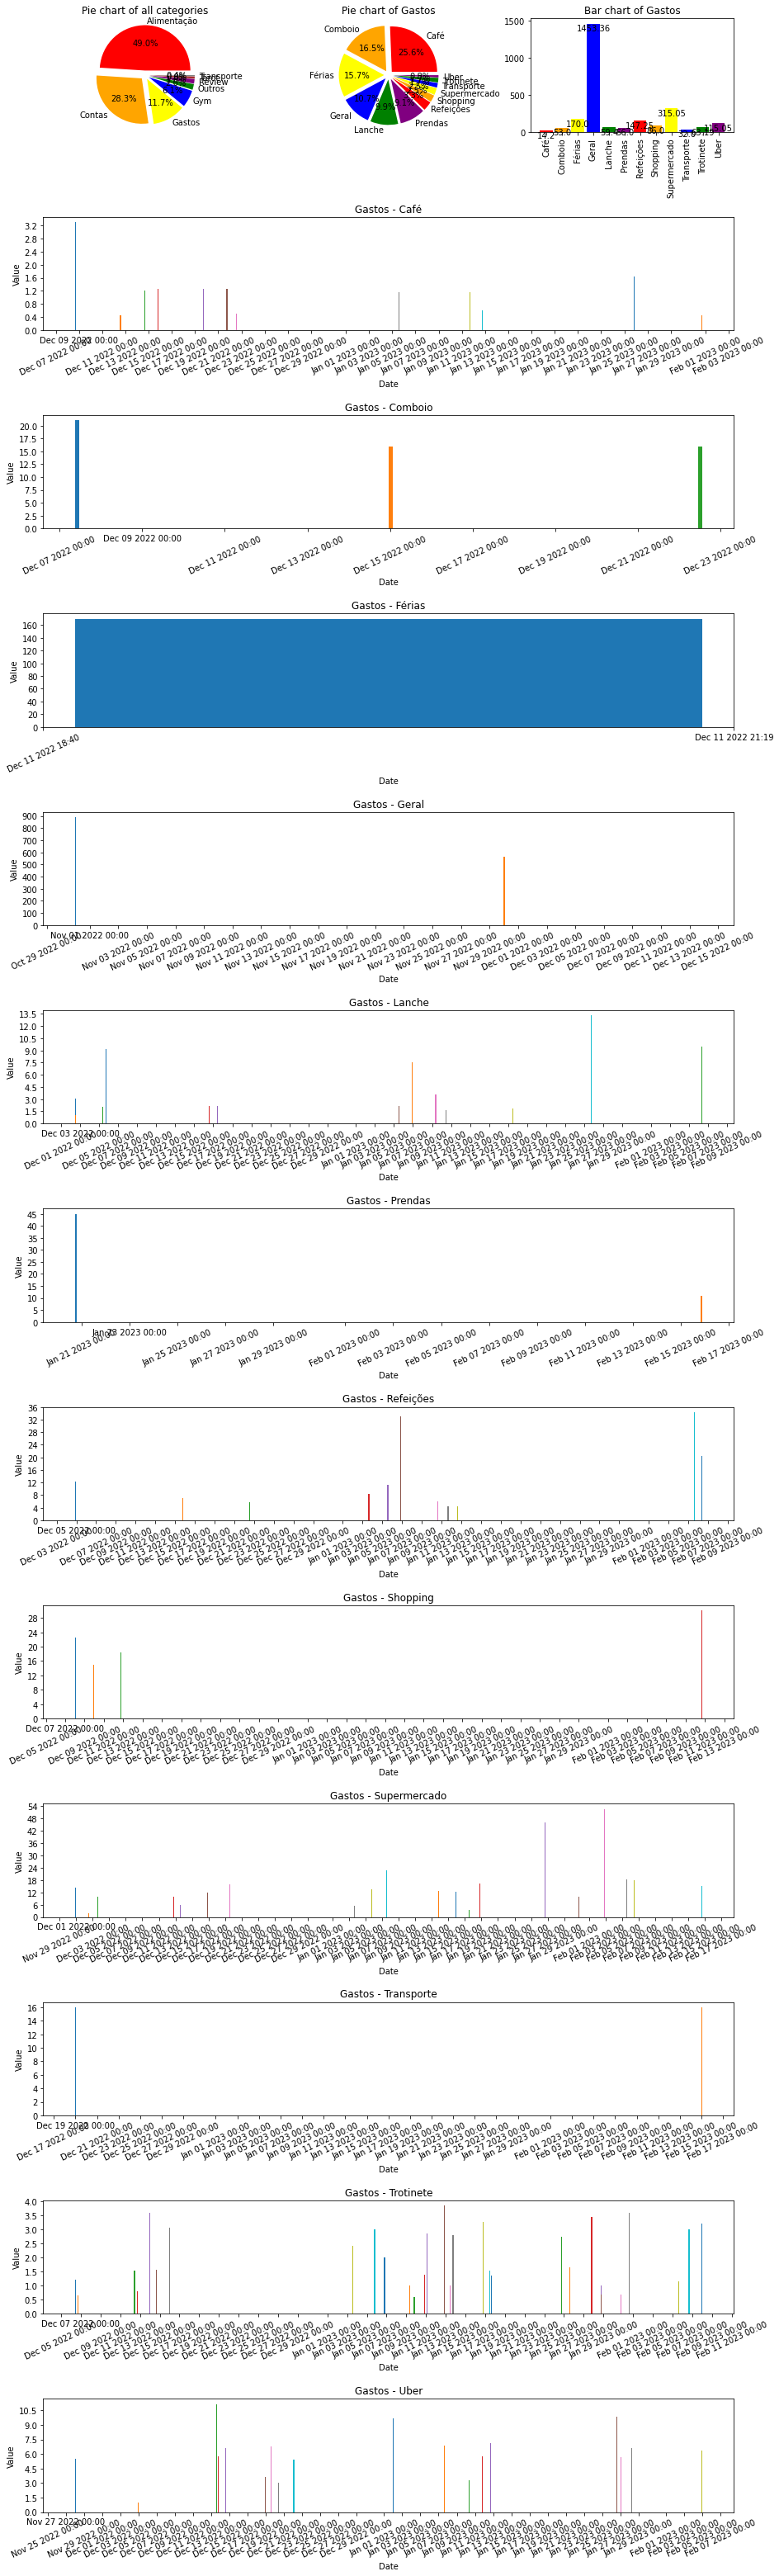

In [34]:
category = 'Gastos'

df_category = get_category_df(df_categories, category)

types = df_category['Type'].unique()

print('Categories of', username,':\n', categories)
print('\nTypes of', category,':\n', df_category['Type'].unique())

plot_in_one(df_category, df, types)

In [35]:
df_category = df_category.loc[(df_category['Date'] >= '2023-01-01') & (df_category['Date'] <= '2023-01-31')]
total_sum = []
for each in types:
    df_type = get_type_df(df_category, each)
    type_sum = sum(df_type['Value'])
    total_sum.append(type_sum)

    print(category + ' ' + each + ': %.2f' % type_sum)

print('Total: %.2f' % sum(total_sum))

Gastos Café: 4.55
Gastos Comboio: 0.00
Gastos Férias: 0.00
Gastos Geral: 0.00
Gastos Lanche: 30.10
Gastos Prendas: 45.00
Gastos Refeições: 67.55
Gastos Shopping: 0.00
Gastos Supermercado: 141.81
Gastos Transporte: 0.00
Gastos Trotinete: 37.30
Gastos Uber: 54.87
Total: 381.18
